<a href="https://colab.research.google.com/github/Ln11211/neural-networks/blob/main/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN to classify Cifar-10
Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
model = models.Sequential([
       tf.keras.layers.Conv2D(32, (3,3),activation='relu',input_shape=(32,32,3)),
       tf.keras.layers.MaxPooling2D(2,2),
       tf.keras.layers.Conv2D(64, (3,3) ,activation='relu'),
       tf.keras.layers.MaxPooling2D(2,2),
       tf.keras.layers.Conv2D(64, (3,3) ,activation='selu'),
       layers.Flatten(),
       tf.keras.layers.Dense(64,activation='relu'),
       tf.keras.layers.Dense(10),
])

In [21]:
LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NUM_EPOCHS = 20
callback=tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.01,restore_best_weights=True)
OPTIMIZER = tf.keras.optimizers.Adam()

model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, 
                    validation_data=(test_images, test_labels),callbacks=[callback])

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4190 - accuracy: 0.4892 - val_loss: 1.1052 - val_accuracy: 0.6098
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0481 - accuracy: 0.6338 - val_loss: 0.9934 - val_accuracy: 0.6495
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9164 - accuracy: 0.6766 - val_loss: 0.9565 - val_accuracy: 0.6635
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8329 - accuracy: 0.7070 - val_loss: 0.9320 - val_accuracy: 0.6779
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7678 - accuracy: 0.7305 - val_loss: 0.8499 - val_accuracy: 0.7080
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7072 - accuracy: 0.7500 - val_loss: 0.8811 - val_accuracy: 0.6916
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6594 - accuracy: 0.7680 - val_loss: 0.8672 - val_accuracy:

Text(0, 0.5, 'Loss')

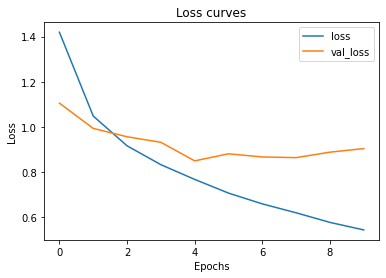

In [22]:
import pandas as pd
df=pd.DataFrame(history.history)
df[['loss','val_loss']].plot()
plt.title("Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

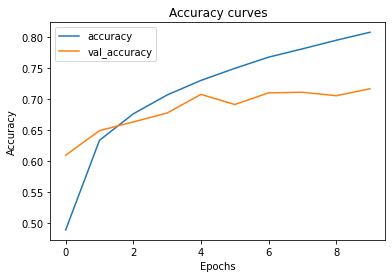

In [23]:
df[['accuracy','val_accuracy']].plot()
plt.title("Accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [68]:
labels={0:'airplane',
        1:'automobile',
        2:'bird',
        3:'cat',
        4:'deer',
        5:'dog',
        6:'frog',
        7:'horse',
        8:'ship',
        9:'truck'
        }

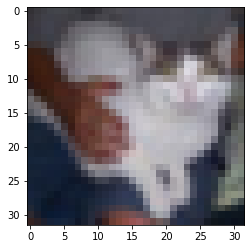

In [74]:
plt.imshow(test_images[77])

#**What coult this be?, looks like a cat, let's ask the model ;)**

In [70]:
import numpy as np
prediction=labels.get( np.argmax(model.predict( test_images[77].reshape(1,32,32,3) )) )
print("It's a",prediction)

1/1 [==============================] - 0s 22ms/step
It's a cat


1/1 [==============================] - 0s 16ms/step
It's a airplane


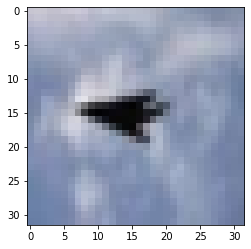

In [118]:
import random
rand= random.randint(0,len(test_images))
plt.imshow(test_images[rand])
prediction=labels.get( np.argmax(model.predict( test_images[rand].reshape(1,32,32,3) )) )
print("It's a",prediction)

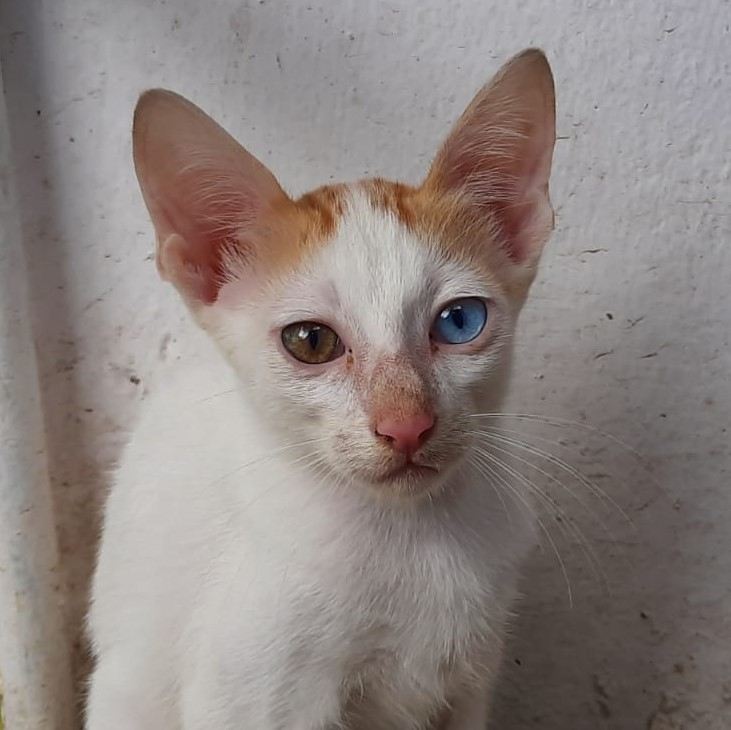 

let's try guessing on this image of my cat. Resizing it into 32x32 pixels

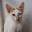

In [151]:
from PIL import Image
img=Image.open("Safeimagekit-resized-img.png")
img

In [152]:
print(img.mode)
img_array=np.array(img)
np.shape(img_array)

RGBA


(32, 32, 4)

**Since the image has the Alpha channel, we shall convert it into a 3 channel image**

In [153]:
img=img.convert("RGB")

In [154]:
img_array=np.array(img)
np.shape(img_array)

(32, 32, 3)

1/1 [==============================] - 0s 17ms/step
It's a dog


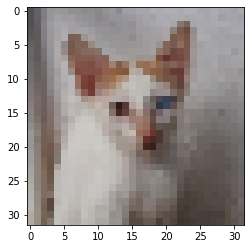

In [155]:
plt.imshow(img_array)
prediction=labels.get( np.argmax(model.predict( img_array.reshape(1,32,32,3) )) )
print("It's a",prediction)